# MOVIESCOPE

## Fiz só para visualização de output


---------------------------------------------

Cabeçalho do dataset filmes

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "

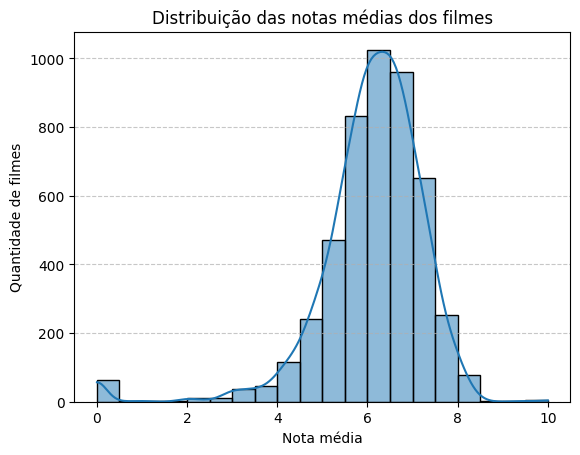

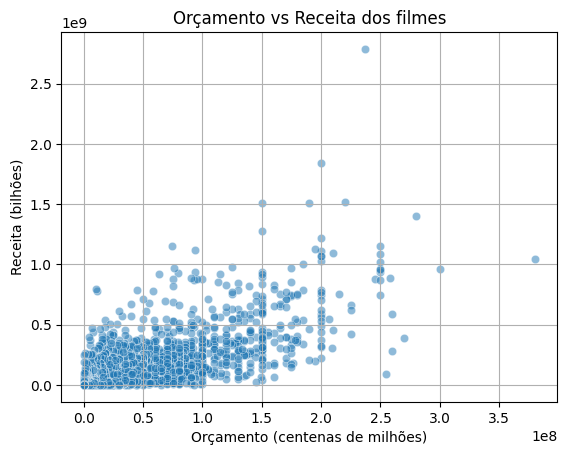

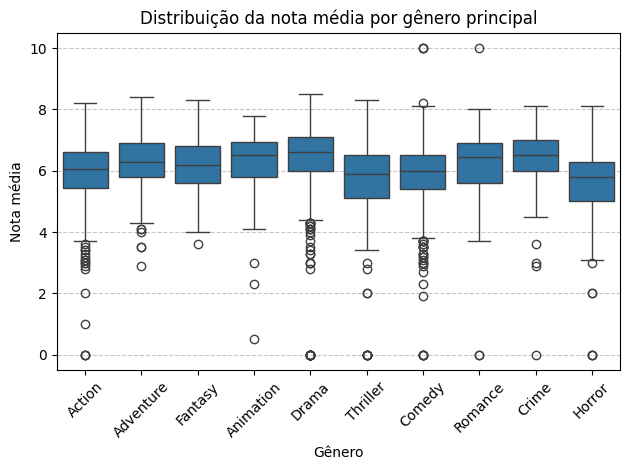

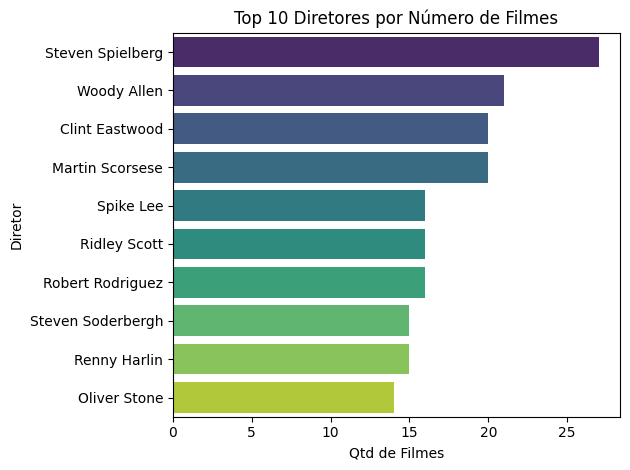


---------------------------------------------

avaliacao do modelo:

MSE: 0.57
RMSE: 0.76
R²: 0.33

---------------------------------------------


---------------------------------------------

Análise do Modelo Preditivo

 o modelo obteve um r² de 0.33, ou seja, tem uma variação de 33% que pode ser explicada com as variaveis que foram escolhidas
Este modelo tem um resultado modesto, oque diz que as metricas embora tem certa influencia, não é exatamente oque diz se vai ser bom ou não.

---------------------------------------------



<Figure size 640x480 with 0 Axes>

In [1]:
# -*- coding: utf-8 -*-
"""
Nome: Victor Augusto de Aquino Silvério

Atividade: Desafio Final - Análise de Dados e Modelo Preditivo com TMDB 5000
"""

# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# carregando os csvs
path_filmes = r'C:\Users\victo\Python_Senai390\Desafio_Final\MovieScope\Dataset\tmdb_5000_movies.csv'
path_creditos = r'C:\Users\victo\Python_Senai390\Desafio_Final\MovieScope\Dataset\tmdb_5000_credits.csv'

df_filmes = pd.read_csv(path_filmes)
df_creditos = pd.read_csv(path_creditos)

print("\n" + "---"*15 + "\n")
print("Cabeçalho do dataset filmes\n")
print(df_filmes.head())
print("\n" + "---"*15 + "\n")

print("\n" + "---"*15 + "\n")
print("Cabeçalho do dataset creditos\n")
print(df_creditos.head())
print("\n" + "---"*15 + "\n")

# Vou unir ambos, mas para conseguir tenho que renomear a coluna 'movies_id' para só 'id', assim o pandas consegue mesclar (e não só adicionar como outra coluna)
df_creditos = df_creditos.rename(columns={'movie_id': 'id'})

# unindo com merge
df_completo = pd.merge(df_filmes, df_creditos, on='id')

# arrumando umas colunas que deram bug
df_completo = df_completo.rename(columns={'title_x': 'title'})
df_completo = df_completo.drop('title_y', axis=1)


print("\n" + "---"*15 + "\n")
print("Cabeçalho do dataset mesclado\n")
print(df_completo.head())
print("\n" + "---"*15 + "\n")

# tratamento: 

print("\n" + "---"*15 + "\n")
print("Valores nulos atuais\n")
print(df_completo.isnull().sum())
print("\n" + "---"*15 + "\n")

# a coluna 'homepage' tem muitos nulos, vou remove-la (não ia usar mesmo)
df_completo.drop(columns=['homepage'], inplace=True)

# vou completar o tempo de filme com a média do dataset
media_runtime = df_completo['runtime'].mean()
df_completo['runtime'] = df_completo['runtime'].fillna(media_runtime)

# apagar as linhas com dados nulos na data de lançamento:
df_completo.dropna(subset=['release_date'], inplace=True)

#apagando outras colunas inuteis:
df_completo.drop(columns=['tagline', 'overview', 'status'], inplace=True)

print("\n" + "---"*15 + "\n")
print("dados pós tratamento:\n")
print(df_completo.isnull().sum())
print("\n" + "---"*15 + "\n")

# como as colunas 'genres', 'production_companies' e 'spoken_languages' estão em formato JSON,
# vamos extrair apenas o primeiro item de cada para simplificar a análise.

# a coluna generos está em formato json, vou retirar só o 1°, que é consequentemente o principal, é depois colocar em uma nova coluna
def extrair(json_str):
    try:
        lista = json.loads(json_str)
        if lista:
            return lista[0]['name']
    except (TypeError, json.JSONDecodeError):
        return None

df_completo['genero_principal'] = df_completo['genres'].apply(extrair)

print("\n" + "---"*15 + "\n")
print("após extração do genero principal\n")
print(df_completo['genero_principal'].head())
print("\n" + "---"*15 + "\n")

# como há filmes sem orçamento e sem receita, vou filtrar só pelos que tem
df_orcamento_receita = df_completo[(df_completo['budget'] > 0) & (df_completo['revenue'] > 0)].copy()

#gerando estatisticas
estatisticas = df_orcamento_receita[['budget', 'revenue', 'vote_average', 'popularity', 'vote_count', 'runtime']].agg(['mean', 'median', 'std', 'var']).round(2)

print("\n" + "---"*15 + "\n")
print("estastiticas dos filmes com orçamento e receita\n")
print(estatisticas)
print("\n" + "---"*15 + "\n")

print("\n" + "---"*15 + "\n")
print("análise\n")
print("no orçamento e na receita, a media é bem maior que a mediana, oque indica a presença de outliers, provavente por causa de filmes gigantescos (como vingadores, disney e etc), que faz a média subir, enquanto a maioria dos filmes ter orçamento e lucros menores.")
print(" A nota média e a mediana, são bem parecitas, oque bate com o desvio padrão baixo. e que a maioria das notas é em torno de 6")
print("A popularidade também tem uma diferença muito grande entre a média e a mediana, indicando a presença de outliers, ou seja, poucos filmes alcançam uma audiencia altissima")
print("\n" + "---"*15 + "\n")


# graficos

# 1 - histograma da distribuição das notas
sns.histplot(df_completo['vote_average'], bins=20, kde=True)
plt.title('Distribuição das notas médias dos filmes')
plt.xlabel('Nota média')
plt.ylabel('Quantidade de filmes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.clf()

# 2 dispersão de Orçamento vs. Receita
sns.scatterplot(x='budget', y='revenue', data=df_orcamento_receita, alpha=0.5)
plt.title('Orçamento vs Receita dos filmes')
plt.xlabel('Orçamento (centenas de milhões)')
plt.ylabel('Receita (bilhões)')
plt.grid(True)
plt.show()
plt.clf()

# 3 boxplot da avaliação por gênero
top_generos = df_completo['genero_principal'].value_counts().nlargest(10).index
df_top_generos = df_completo[df_completo['genero_principal'].isin(top_generos)]

sns.boxplot(x='genero_principal', y='vote_average', data=df_top_generos)
plt.title('Distribuição da nota média por gênero principal')
plt.xlabel('Gênero')
plt.ylabel('Nota média')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.clf()

# 4 - Filmes por diretor:

# aqui crio uma função para extrar o diretor
def extrair_diretor(json_str):
    try:
        for item in json.loads(json_str):
            if item['job'] == 'Director':
                return item['name']
    except (TypeError, json.JSONDecodeError):
        return None
    return None

df_completo['diretor'] = df_completo['crew'].apply(extrair_diretor)

contagem_diretores = df_completo['diretor'].value_counts().nlargest(10)

# faço o grafico
sns.barplot(x=contagem_diretores.values, y=contagem_diretores.index, palette='viridis', hue=contagem_diretores.index, legend=False)
plt.title('Top 10 Diretores por Número de Filmes')
plt.xlabel('Qtd de Filmes')
plt.ylabel('Diretor')
plt.tight_layout()
plt.show()
plt.clf()

#modelo de previsão
# Objetivo: Prever 'vote_average' com base nas colunas 'budget','revenue', 'popularity', 'vote_count' e 'runtime'

# como usamos o orçamento e receita aqui, só copiei do dataset previamente filtrado
df_modelo = df_orcamento_receita.copy()

# variaveis de predição
variaveis = ['budget', 'revenue', 'popularity', 'vote_count', 'runtime']
#alvo
target = 'vote_average'

X = df_modelo[variaveis]
y = df_modelo[target]

# divide os dados em 80% treino, 20% teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# treina o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# prevendo com o modelo:
previsoes = modelo.predict(X_teste)

#testes de precisão
mse = mean_squared_error(y_teste, previsoes)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, previsoes)

print("\n" + "---"*15 + "\n")
print("avaliacao do modelo:\n")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print("\n" + "---"*15 + "\n")

print("\n" + "---"*15 + "\n")
print("Análise do Modelo Preditivo\n")
print(" o modelo obteve um r² de 0.33, ou seja, tem uma variação de 33% que pode ser explicada com as variaveis que foram escolhidas")
print("Este modelo tem um resultado modesto, oque diz que as metricas embora tem certa influencia, não é exatamente oque diz se vai ser bom ou não.")
print("\n" + "---"*15 + "\n")